In [27]:
import pandas as pd
import joblib
import json
import numpy as np

def load_config(config_file="../config.json"):
    """Load configuration from a JSON file."""
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

In [2]:
sel_pov = 'low'

In [4]:
classifier = joblib.load(f"../outputs/random_forest_{sel_pov}_poverty.pkl")

In [5]:
classifier.n_features_in_

45

In [8]:
config = load_config()

In [9]:
selected_pov_col_name = config["poverty_columns"][f"{sel_pov}"]
selected_pov_col_name

'poverty_level_low poverty'

In [11]:
X_test = pd.read_csv("../outputs/x_test.csv")
X_test = X_test.set_index("projectid")

In [12]:
X_test

,teacher_referred_count,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,school_metro_rural,...,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors
projectid,,,,,,,,,,,,,,,,,,,,,
90de744e368a7e4883223ca49318ae30,0.0,296.47,22.0,4234,39661,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
32943bb1063267de6ed19fc0ceb4b9a7,0.0,430.89,17.0,62,6610,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
bb18f409abda2f264d5acda8cab577a9,0.0,576.07,12.0,20364,73182,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
24761b686e18e5eace634607acbcc19f,0.0,408.40,24.0,22097,126242,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
eac7d156205f1333de3887d656f46611,0.0,750.92,20.0,310,9837,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b46297e0ce1a9413a9b93b7c2e73058d,0.0,497.26,23.0,964,126242,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
f53cc9d7523e06284d101ad9f5490b42,0.0,202.03,20.0,1965,9403,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
c262a209752d5131e6c24f2290244cef,0.0,169.77,160.0,896,39661,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [13]:
X_test_filtered = X_test[X_test[selected_pov_col_name] == True].drop(columns=[*config["poverty_columns"].values()], axis=1)

In [14]:
X_test_filtered

,teacher_referred_count,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,school_metro_rural,school_metro_suburban,school_metro_urban,grade_level_Grades 3-5,grade_level_Grades 6-8,...,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors
projectid,,,,,,,,,,,,,,,,,,,,,
e503b2bd58bcdbd3258fb4ba58824f67,0.0,299.42,21.0,31,126242,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6f122eb25a570935a4ae888829a7d752,0.0,474.26,20.0,21,9403,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1e4e05d0c6c3ce62fe9af0b9e6a092c9,0.0,3073.98,28.0,98,12330,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6cb880746a03fb805c703c4ee13a1f78,0.0,1136.46,150.0,27,126242,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1628fb56d6d5a24353fe5dac4d970a39,0.0,527.65,25.0,280,126242,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ed48af1d8aa8b2b1d600fead78317d3d,0.0,4263.57,27.0,44,12330,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4213b586d077276ade882a5ea7ef65d4,0.0,772.79,114.0,112,12097,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
b948eb8067f5e0456f8d7ad0e55eadb4,0.0,969.13,165.0,84,9304,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [15]:
probability_get_fully_funded = classifier.predict_proba(X_test_filtered)[:, 1]

In [16]:
X_test_filtered['probability_get_fully_funded'] = probability_get_fully_funded

In [17]:
projects_file = '../data/projects.csv'

In [18]:
projects_df = pd.read_csv(projects_file, parse_dates=['date_posted'])
projects_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [19]:
projects_df.shape

(664098, 35)

In [20]:
max_date = projects_df['date_posted'].max()
# between 3-4 months projects
low_end_date = max_date - pd.DateOffset(months=4)
high_end_date = max_date - pd.DateOffset(months=3)


In [21]:
low_end_date, high_end_date

(Timestamp('2014-01-12 00:00:00'), Timestamp('2014-02-12 00:00:00'))

In [22]:
projects_ids_3_4_months_df = projects_df[(projects_df.date_posted<=high_end_date) & (projects_df.date_posted>low_end_date)].projectid.to_list()

In [23]:
projects_ids_3_4_months_df

['1d86fd3d645f025cd7c7898b7113168d',
 '48d396bece2866c7869725a8ecb1fcb7',
 '19c0f7e78bea087a9ef1a348b35225bf',
 '65b1e38e56067b164397761bf98e665b',
 'd754be48f28fbdc146e613f269230338',
 'db0b7c81d6517ad5dc67ed854d349f7b',
 '02659d327a99366cdb428b070953b647',
 'c1a75ce187545ca5d81cc1e2e208357a',
 '79da8dfd0539b8cf8c11818ddfe88716',
 'ca6fd831c5e689d885aa367970e21d1b',
 'a131c5cf787b6d58310242fcc09cf826',
 '924b0ee536b24a836cdd7ba0e6e68b78',
 'c1822dc0b58173d866b947147f3fdf7d',
 'e0d2497e89c86e144e9f47a16be23a1b',
 'e2fa8ff3158edbf89d1aef3a2985c114',
 '8311c7fc22df343e83e3922279d93320',
 'e592249f18d3b3ee927418e8ee3523bb',
 '14f5bf6c81a4c35fbbfa6ddf0324f98d',
 '692deda40c68d37cdf3df32d8726d284',
 '91b8483bdca68a6488f09fca8edb5a7a',
 '5941094c62c73167581f438639ff738f',
 '83805df09bea88d8ac3455f2db982d09',
 'eb035b71b5b7c2db7f2ba6e642d7361e',
 '1e90deaee7f020e2bc0f8b5392beaa02',
 '7998b1d3326ae382ee3c07bcac435664',
 'd8857a33929224693f6bb6c569122fa1',
 'f1a2daf184f3599e0786feca0dee5076',
 

In [24]:
projects_3_4_months_test_df = X_test_filtered[X_test_filtered.index.isin(projects_ids_3_4_months_df)]

In [25]:
projects_3_4_months_test_df

,teacher_referred_count,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,school_metro_rural,school_metro_suburban,school_metro_urban,grade_level_Grades 3-5,grade_level_Grades 6-8,...,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,probability_get_fully_funded
projectid,,,,,,,,,,,,,,,,,,,,,
5e70465c1958ccfd21376e18d91223fb,0.0,569.96,60.0,39,126242,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,0.60
6bb65203b8d33635bac1d50961a213cd,0.0,359.46,88.0,5661,126242,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,0.45
58ea193ea8f14544ee8c7a894b873e31,0.0,294.55,60.0,54,12330,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0.58
feacab4195f2d158cf41c029d708dff5,0.0,654.62,21.0,2434,43478,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0.39
15b45977ec5e06743b455b9589c9a356,0.0,383.37,25.0,114,7021,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ed48af1d8aa8b2b1d600fead78317d3d,0.0,4263.57,27.0,44,12330,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0.49
4213b586d077276ade882a5ea7ef65d4,0.0,772.79,114.0,112,12097,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,0.54
b948eb8067f5e0456f8d7ad0e55eadb4,0.0,969.13,165.0,84,9304,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0.51


In [26]:
recommendation_list_df = projects_3_4_months_test_df.sort_values(by='probability_get_fully_funded', ascending=False)
recommendation_list_df

,teacher_referred_count,total_price_excluding_optional_support,students_reached,total_projects_in_city,total_projects_in_state,school_metro_rural,school_metro_suburban,school_metro_urban,grade_level_Grades 3-5,grade_level_Grades 6-8,...,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,probability_get_fully_funded
projectid,,,,,,,,,,,,,,,,,,,,,
a60ebcfc53aac9c335b4eff1d7d94a2c,0.0,334.35,20.0,20364,73182,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,1.000
6cd6ab80464477e786fe35630bfa167a,0.0,235.56,27.0,407,126242,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,0.950
72926ececed201e34f5ea8093048d618,0.0,150.77,20.0,19,30605,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0.920
4a3e7bce8ada7676a42232df3994ddec,0.0,369.23,35.0,1156,126242,False,False,True,True,False,...,False,False,True,False,False,True,False,False,False,0.920
592088c6a1bb6235884dca97192186d6,0.0,149.57,15.0,22097,126242,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd762f218cbfd7bf1390de7c7924d3a5,0.0,2092.97,32.0,4511,126242,False,False,True,True,False,...,False,False,False,False,False,False,True,False,False,0.190
85c6c0322b73394ddf26432549adb712,0.0,614.23,46.0,22097,126242,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0.158
7a5fc595e5ab03d53b92db6642949a25,0.0,384.24,20.0,13,40167,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,0.140


In [28]:
np.histogram(recommendation_list_df.probability_get_fully_funded)

(array([ 5,  9, 14, 28, 43, 23, 15, 33, 15,  4]),
 array([0.12 , 0.208, 0.296, 0.384, 0.472, 0.56 , 0.648, 0.736, 0.824,
        0.912, 1.   ]))

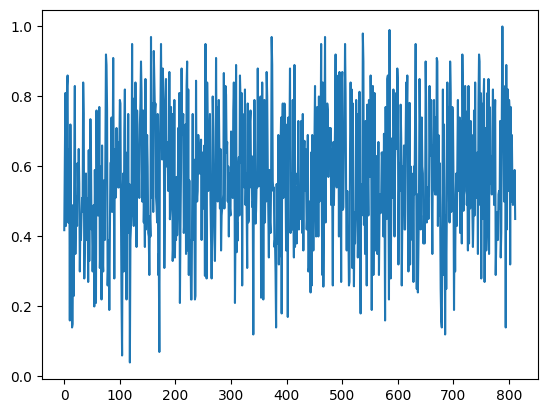

In [29]:
import matplotlib.pyplot as plt
plt.plot(probability_get_fully_funded)